In [4]:
import os
import glob
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime as dt

from onc.onc import ONC

dirO = os.chdir('C:/Users/aBr/Desktop/ONC/DR Drew/search23003665')

onc = ONC('533c0804-3482-4efb-813b-681d357440d6')

%matplotlib inline

In [5]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [6]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [ ]:
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

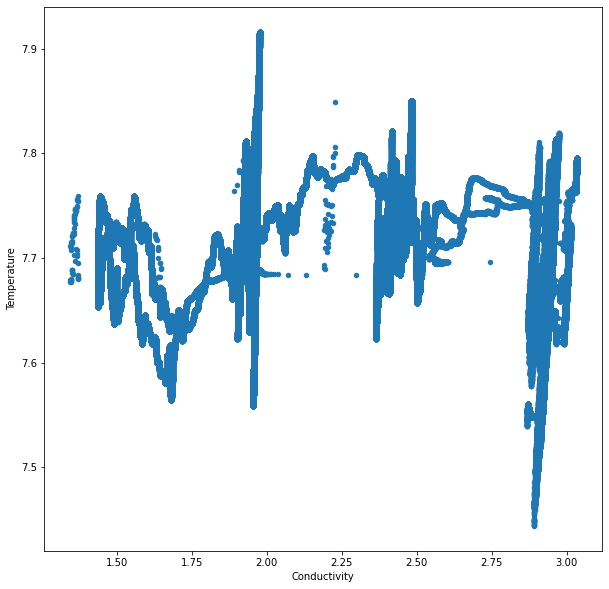

In [7]:
combined_csv.rename(columns={combined_csv.columns[1]: 'Conductivity'},inplace=True)
combined_csv.rename(columns={combined_csv.columns[15]: 'Temperature'}, inplace=True)
combined_csv.reset_index(drop=True, inplace=True)
fig = combined_csv.plot.scatter(x='Conductivity',y='Temperature',figsize=(10,10))

In [ ]:
combined_csv.head(2)

In [ ]:
combined_csv.tail(2)

In [10]:
combined_csv.rename(columns={combined_csv.columns[0]: 'UTC time', combined_csv.columns[1]: 'Conductivity',combined_csv.columns[15]: 'Temperature'},inplace=True)

In [8]:
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import numpy as np
# modified hsv in 256 color class
hsv_modified = cm.get_cmap('hsv', 256)
newcmp = ListedColormap(hsv_modified(np.linspace(0.6,1,256)))# blue to red

In [11]:
from datetime import datetime

combined_csv['UTC time'] = combined_csv['UTC time'].apply(lambda x:datetime.strptime(x,"%Y-%m-%dT%H:%M:%S.%fZ"))

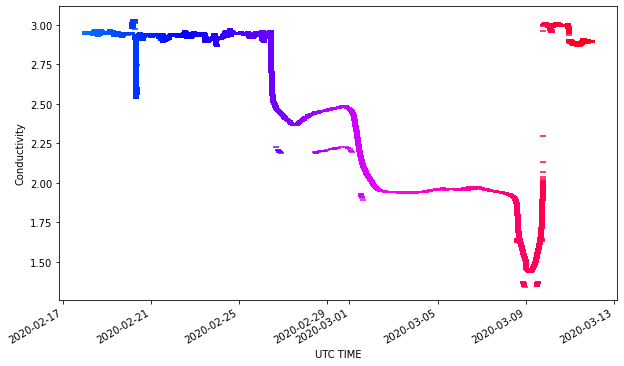

In [12]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(combined_csv['UTC time'],combined_csv['Conductivity'], c= combined_csv['UTC time'],marker='_',  cmap =newcmp)
plt.xlabel("UTC TIME")
plt.ylabel("Conductivity")

plt.gcf().autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


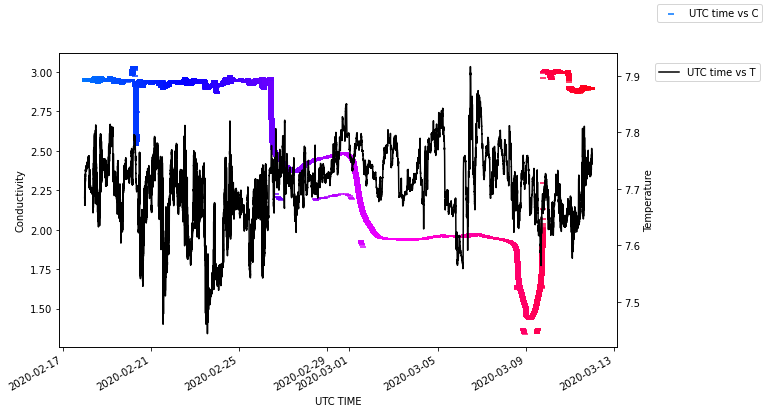

In [13]:
fig, ax1 = plt.subplots() 

ax1.set_xlabel('UTC TIME') 
ax1.set_ylabel('Conductivity') 
ax1.scatter(combined_csv['UTC time'], combined_csv['Conductivity'], c= combined_csv['UTC time'],marker='_',  cmap =newcmp, label = 'UTC time vs C') 
fig.legend()

ax2 = ax1.twinx() 
ax2.set_ylabel('Temperature') 
ax2.plot(combined_csv['UTC time'], combined_csv['Temperature'],color ='black', label='UTC time vs T') 
plt.gcf().autofmt_xdate()
fig.set_size_inches(10, 6, forward=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)

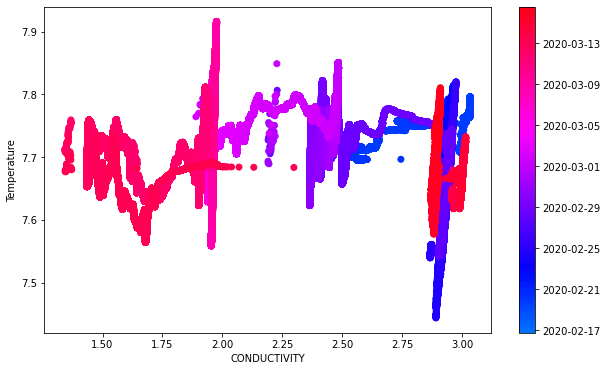

In [17]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots()
sc = ax.scatter(combined_csv['Conductivity'],combined_csv['Temperature'], c=combined_csv['UTC time'],  cmap =newcmp)
plt.ylabel("Temperature")
plt.xlabel("CONDUCTIVITY")

cb = fig.colorbar(sc, orientation='vertical')
cb.ax.set_yticks(["2020-02-17", "2020-02-21", "2020-02-25","2020-02-29", "2020-03-01","2020-03-05","2020-03-09","2020-03-13"])
cb.ax.set_yticklabels(["2020-02-17", "2020-02-21", "2020-02-25","2020-02-29", "2020-03-01","2020-03-05","2020-03-09","2020-03-13"])
fig.set_size_inches(10, 6, forward=True)

#cb.ax.set_yticklabels(combined_csv['UTC time'].dt.strftime("%Y-%m-%d"))

In [ ]:
combined_csv['UTC time'].iloc[0]

In [ ]:
combined_csv['UTC time'].iloc[-1]